In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
#przeglądanie danych zbioru
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

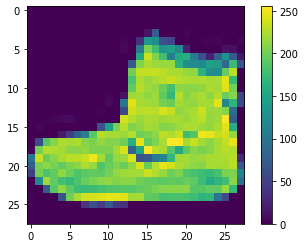

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#normaliacja danych
train_images = train_images/255.0
test_images = test_images/255.0

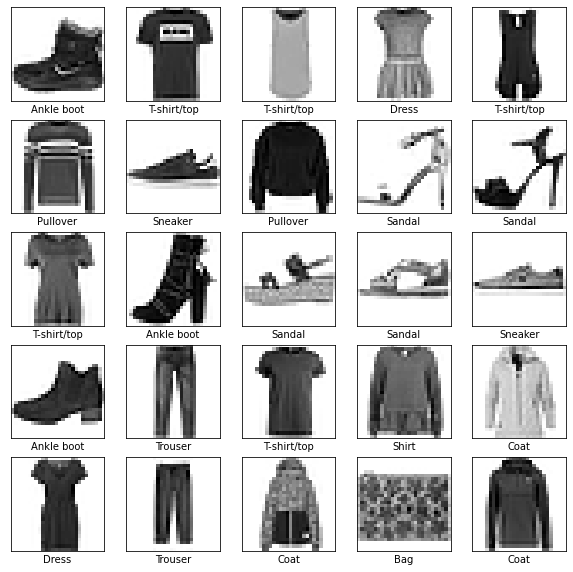

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#budowa modelu - sekwencyjna sieć neuronowa
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2345 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2251 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2193 - accuracy: 0.9173
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2137 - accuracy: 0.9191
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2068 - accuracy: 0.9223
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2006 - accuracy: 0.9250
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1970 - accuracy: 0.9255
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1915 - accuracy: 0.9272
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1851 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.182

In [17]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"strata wynosi: {test_loss}, dokładność: {test_acc}")

313/313 - 0s - loss: 0.3456 - accuracy: 0.8862 - 405ms/epoch - 1ms/step
strata wynosi: 0.34564003348350525, dokładność: 0.8862000107765198


In [18]:
#prognoza
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [20]:
predictions[0]

array([2.1842477e-09, 8.7002927e-10, 2.4287663e-08, 2.8549232e-11,
 1.3006176e-12, 1.3151048e-06, 4.3841755e-08, 6.1414344e-04,
 1.0723934e-06, 9.9938339e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
def plot_image(i,predictions_array,true_label,img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),color=color)

In [25]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.ylabel([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predticted_label = np.argmax(predictions_array)

    thisplot[predticted_label].set_color('red')
    thisplot[true_label].set_color('blue')

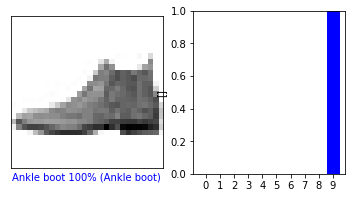

In [26]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

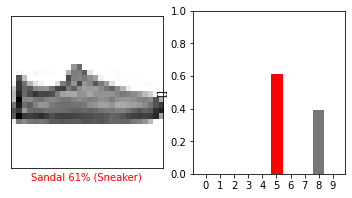

In [27]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

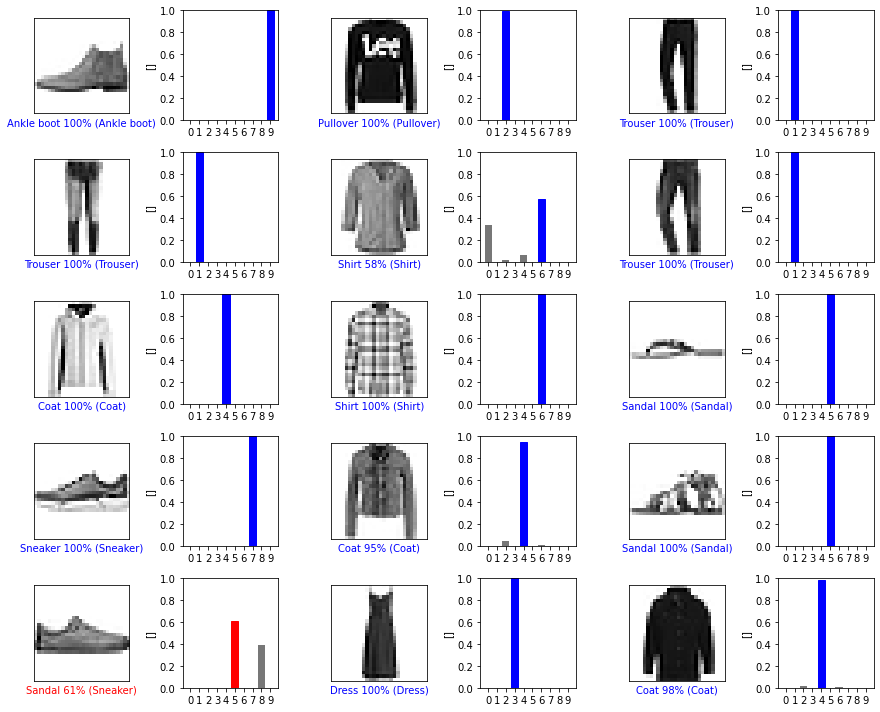

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [29]:
img = test_images[1]
print(img.shape)

(28, 28)


In [30]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[1.6064286e-04 1.2710785e-09 9.9735630e-01 8.1610301e-09 2.3408611e-03
  2.7119662e-10 1.4221272e-04 4.8057443e-17 3.6229759e-09 2.5576982e-12]]


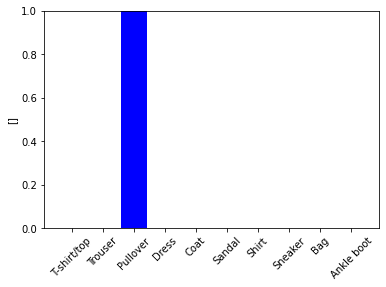

In [32]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [33]:
np.argmax(predictions_single[0])

2